# Quantum Algorithms 

## Table of Contents

### Oracular
* [Deutsch-Jozsa Algorithm](#Deutsch-Jozsa-Algorithm)
* [Bernstein-Vazirani Algorithm](#Bernstein-Vazirani-Algorithm)
* Simon's Algorithm

In [1]:
import numpy as np

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
from qiskit.visualization import plot_histogram

## Deutsch-Jozsa Algorithm

In [2]:
def dj_oracle(case, n):
    oracle_qc = QuantumCircuit(n+1)
    
    # Balanced Oracle
    if case == "balanced":
        
        # Produce the binary string that dictates the form of the balanced oracle 
        b = np.random.randint(1,2**n)
        b_str = format(b, '0'+str(n)+'b')
        
        #Wrap the initial balanced oracle with X-gates according to b_str
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
                
        #Initial balanced oracle 
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Constant Oracle 
    if case == "constant":
        # The output of the function is either 0 or 1
        output = np.random.randint(2)
        #If 1 then the oracle is equivalent X-gate on the auxillary
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" 
    return oracle_gate

In [3]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    
    # Set up the auxillary qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    
    # Set up the control qubits:
    for qubit in range(n):
        dj_circuit.h(qubit)
        
    # Append the oracle gate:
    dj_circuit.append(oracle, range(n+1))
    
    # Pad the control qubits with the H-gates
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    # Measure the control qubits
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

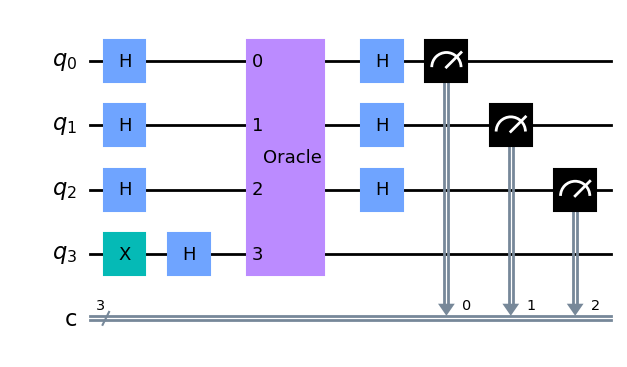

In [12]:
# Example of Deutsch-Josza algorithm
n = 3
oracle_gate = dj_oracle('balanced', n)
#oracle_gate = dj_oracle('constant', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw(output='mpl')


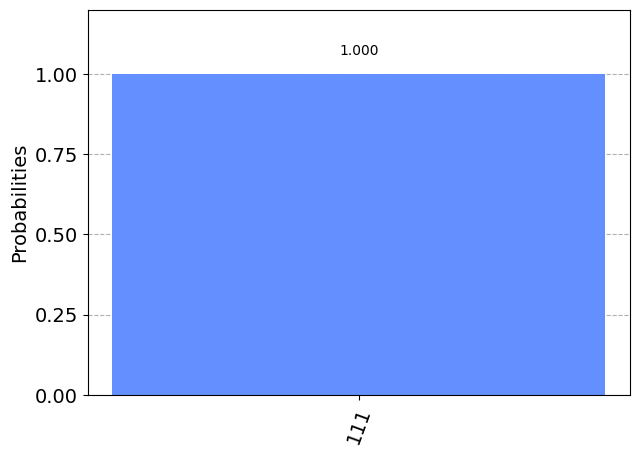

In [13]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

## Bernstein-Vazirani Algorithm